# Import relevant libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os         
from random import shuffle 
from tqdm import tqdm      
import tensorflow as tf

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

# Initializing constants  and uploading data

In [29]:
IMG_SIZE = 256
LR = 1e-3

In [39]:
train_data = np.load('train_data_256_c.npy')
test_data = np.load('test_data_256_2.npy')

# Splitting into Training and Validation set

In [40]:
train = train_data[:-214]
test = train_data[-214:]

X_train = np.array([i[0] for i in train]).reshape([-1,IMG_SIZE, IMG_SIZE, 1])
y_train = [i[1] for i in train]

X_test = np.array([i[0] for i in test]).reshape([-1,IMG_SIZE, IMG_SIZE, 1])
y_test = [i[1] for i in test]

# Building the CNN

In [41]:
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 128, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 5, activation='softmax')

convnet = regression(convnet, optimizer='adam', loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0, checkpoint_path='model_balanced_256.tflearn')

model.load('model_balanced_256.tflearn')

INFO:tensorflow:Restoring parameters from /home/mohilbajaj2002/Desktop/Deep_Learning/model_balanced_256.tflearn


# Testing 

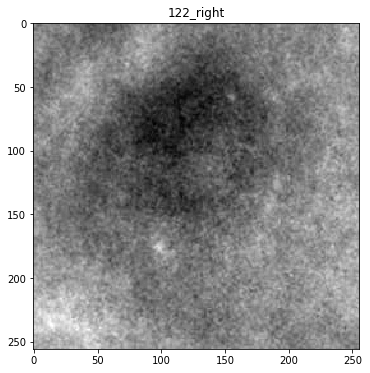

In [59]:
d = test_data[0]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
plt.title(img_num)
ax.imshow(img_data, cmap="gray")
plt.show()


In [60]:
print(f"No DR: {prediction[0]}")
print(f"Mild DR: {prediction[1]}")
print(f"Moderate DR: {prediction[2]}")
print(f"Severe DR: {prediction[3]}")    
print(f"Proliferative DR: {prediction[4]}")       

No DR: 0.3089333772659302
Mild DR: 0.1928059160709381
Moderate DR: 0.19812311232089996
Severe DR: 0.1713607758283615
Proliferative DR: 0.12877684831619263
